## Prediction Problem - Predict the probability that somebody will experience financial distress in the next two years. Goal - Use the outputted value by the model and convert it to a FICO style score.

In [1]:
%cd "D:\FYP\Give-me-some-credit-master"

D:\FYP\Give-me-some-credit-master


In [2]:
import pandas as pd
df = pd.read_csv("data/cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

#### DebtRatio
2.5% of clients owe around 3490 or more times what they own
For the people who have monthly income in this 2.5%, only 185 people have values for their monthly incomes and the values are either 0 or 1.
There are 164 out of these 185 people who are of two different types, first with no monthly income and does not default and second with monthly income and does default.
#### RevolvingUtilizationOfUnsecuredLines
Defined as ratio of the total amount of money owed to total credit limit distribution of values is right-skewed, consider removing outliers
It is expected that as this value increases, the proportion of people defaulting should increase as well
However, we can see that as the minimum value of this column is set to 13, the proportion of defaulters is smaller than that belonging to the pool of clients with total amount of money owed not exceeding total credit limit.
Thus we should remove those samples with RevolvingUtilizationOfUnsecuredLines's value more than equal to 13


## Removing Outliers

In [3]:
removed_debt_outliers = df.drop(df[df['DebtRatio'] > 3489.025].index)
removed_debt_outliers = removed_debt_outliers.fillna(removed_debt_outliers.median())

In [4]:
# Removed utilization outliers
dfus = removed_debt_outliers.drop(removed_debt_outliers[removed_debt_outliers['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

In [5]:
# Removed 98s
dfn98 = dfus.copy()
dfn98.loc[dfn98['NumberOfTime30-59DaysPastDueNotWorse'] > 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 18
dfn98.loc[dfn98['NumberOfTime60-89DaysPastDueNotWorse'] > 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 18
dfn98.loc[dfn98['NumberOfTimes90DaysLate'] > 90, 'NumberOfTimes90DaysLate'] = 18

In [6]:
pd.crosstab(df.age, df.NumberOfDependents)


NumberOfDependents,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0,20.0
age,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0
21,148,3,1,0,0,0,0,0,0,0,0,0,0
22,385,7,2,2,0,0,0,0,0,0,0,0,0
23,550,33,13,3,0,0,0,0,0,0,0,0,0
24,689,48,19,3,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,0,0,0,0,0,0,0,0,0,0,0,0
101,3,0,0,0,0,0,0,0,0,0,0,0,0
102,2,1,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlation Heatmap')

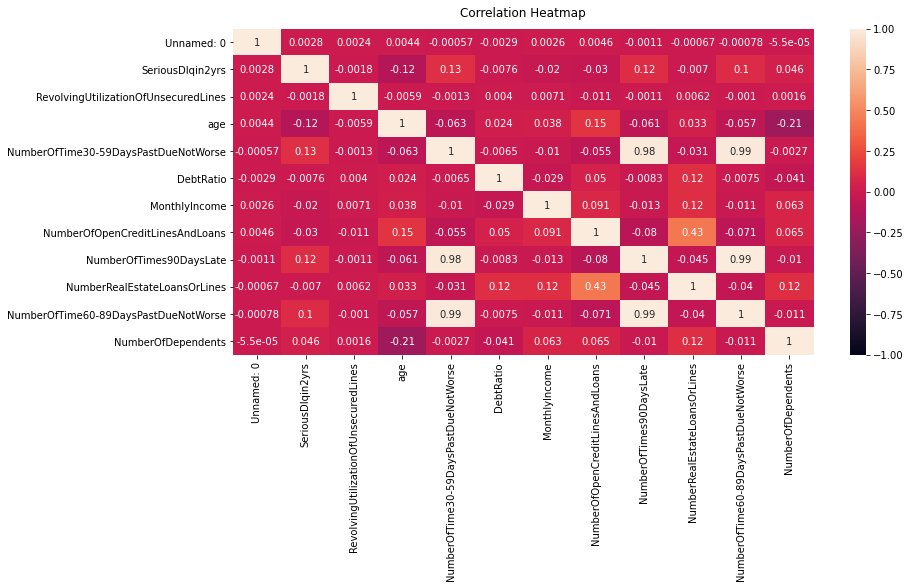

In [7]:
#those in white have very high coorelation with each other 
#we will not take those features that have high corelation with eachother
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


## Basic Cleanling - Converting each column name to camel case.

In [8]:
import re
def camel_to_snake(column_name):
    """
    converts a string that is camelCase into snake_case
    Example:
        print camel_to_snake("javaLovesCamelCase")
        > java_loves_camel_case
    Reference:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [9]:
df.columns = [camel_to_snake(col) for col in df.columns]
collist = df.columns.tolist()[1:]
collist

['serious_dlqin2yrs',
 'revolving_utilization_of_unsecured_lines',
 'age',
 'number_of_time30-59_days_past_due_not_worse',
 'debt_ratio',
 'monthly_income',
 'number_of_open_credit_lines_and_loans',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines',
 'number_of_time60-89_days_past_due_not_worse',
 'number_of_dependents']

## Handling Missing Values

In [10]:
# By not specifying id_vars, we're going to melt EVERYTHING
df_lng = pd.melt(df[collist])
# now our data is a series of (key, value) rows. 
#think of when you've done this in Excel so that you can
#create a pivot table 
df_lng.head()
df_lng.tail()

,variable,value
1649995,number_of_dependents,0.0
1649996,number_of_dependents,2.0
1649997,number_of_dependents,0.0
1649998,number_of_dependents,0.0
1649999,number_of_dependents,0.0


In [11]:
null_variables = df_lng.value.isnull()
null_variables.sum()

33655

In [12]:
# crosstab creates a frequency table between 2 variables
# it's going to automatically enumerate the possibilities between
# the two Series and show you a count of occurrences 
#in each possible bucket
def print_null_freq(df):
    """
    for a given DataFrame, calculates how many values for 
    each variable is null and prints the resulting table to stdout
    """
    df_lng = pd.melt(df)
    null_variables = df_lng.value.isnull()
    return pd.crosstab(df_lng.variable, null_variables)
print_null_freq(df)

value,False,True
variable,,
age,150000,0
debt_ratio,150000,0
monthly_income,120269,29731
number_of_dependents,146076,3924
number_of_open_credit_lines_and_loans,150000,0
number_of_time30-59_days_past_due_not_worse,150000,0
number_of_time60-89_days_past_due_not_worse,150000,0
number_of_times90_days_late,150000,0
number_real_estate_loans_or_lines,150000,0


In [13]:
df.number_of_dependents = df.number_of_dependents.fillna(0)
print_null_freq(df)

value,False,True
variable,,
age,150000,0
debt_ratio,150000,0
monthly_income,120269,29731
number_of_dependents,150000,0
number_of_open_credit_lines_and_loans,150000,0
number_of_time30-59_days_past_due_not_worse,150000,0
number_of_time60-89_days_past_due_not_worse,150000,0
number_of_times90_days_late,150000,0
number_real_estate_loans_or_lines,150000,0


In [14]:
df.number_of_dependents.unique()

array([ 2.,  1.,  0.,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9., 13.])

In [15]:
df.to_csv("data/credit-data-post-import.csv", index=False)

## Imputation

To do this we're going to use the NearestNeighbors algorithm.

In [16]:
#we use imputation to give intelligent values to our missing data
of = pd.read_csv("./data/credit-data-post-import.csv")
df = of[collist]

## Cross Validation

We're going to use the simplest type of cross validation. we'll simply split our data into 2 groups: training and test. we'll use the training set to calibrate our model and then use the test set to evaluate how effective it is.

In [17]:
import numpy as np
#we are randomly spliting our data into 75% training data and 25% testing data
is_test = np.random.uniform(0, 1, len(df)) > 0.75
train = df[is_test==False]
test = df[is_test==True]

In [18]:
from sklearn.neighbors import KNeighborsRegressor

income_imputer = KNeighborsRegressor(n_neighbors=1)

# split our data into 2 groups; data containing nulls and data 
# not containing nulls we'll train on the latter and make
# 'predictions' on the null data to impute monthly_income
train_w_monthly_income = train[train.monthly_income.isnull()==False] #does not contain NULL
train_w_null_monthly_income = train[train.monthly_income.isnull()==True] #contains NULL values
train_w_monthly_income.corr().iloc[:,5] #correlation of features w.r.t to monthly income

serious_dlqin2yrs                             -0.018717
revolving_utilization_of_unsecured_lines       0.007308
age                                            0.033654
number_of_time30-59_days_past_due_not_worse   -0.009383
debt_ratio                                    -0.027714
monthly_income                                 1.000000
number_of_open_credit_lines_and_loans          0.084749
number_of_times90_days_late                   -0.011709
number_real_estate_loans_or_lines              0.114223
number_of_time60-89_days_past_due_not_worse   -0.010188
number_of_dependents                           0.058039
Name: monthly_income, dtype: float64

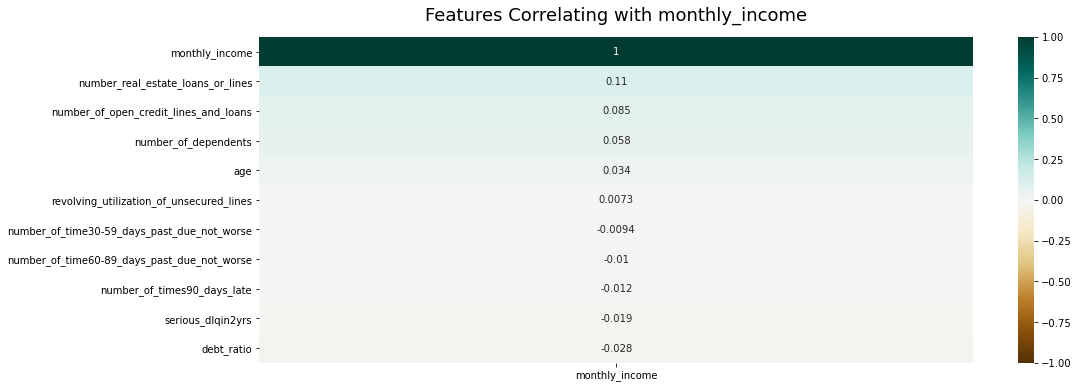

In [19]:
#we are taking only number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans because
#they have the most effect on monthly income
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_w_monthly_income.corr()[['monthly_income']].sort_values(by='monthly_income', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with monthly_income', fontdict={'fontsize':18}, pad=16);



In [20]:
#training KNeighborsRegressor named income_imputer on number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans
cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']
income_imputer.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income) #does not contain NULL values

KNeighborsRegressor(n_neighbors=1)

In [21]:
#predicting monthly income using the KNeighborsRegressor
new_values = income_imputer.predict(train_w_null_monthly_income[cols])
train_w_null_monthly_income['monthly_income'] = new_values #storing predicted income in null values
new_values

<ipython-input-21-402f1cd47d1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_w_null_monthly_income['monthly_income'] = new_values #storing predicted income in null values


array([31666.,  4500.,  5411., ...,  3150.,  7783., 11000.])

In [22]:
#combine the data back together
train = train_w_monthly_income.append(train_w_null_monthly_income)

In [23]:
#retreive the two columns from test set [test_x], and predict monthly income column from it [test_y_imputed]
test['monthly_income_imputed'] = income_imputer.predict(test[cols])

<ipython-input-23-1cac464d7e66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['monthly_income_imputed'] = income_imputer.predict(test[cols])


In [24]:
#replace only the "null" values of test.monthly_income WITH predicted values of test.monthly_income_imputed 
test['monthly_income'] = np.where(test.monthly_income.isnull(), test.monthly_income_imputed,
                                  test.monthly_income)

<ipython-input-24-4ea6a3826e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['monthly_income'] = np.where(test.monthly_income.isnull(), test.monthly_income_imputed,


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import pylab as pl
from sklearn.metrics import classification_report
train.to_csv("./data/credit-data-trainingset.csv", index=False)
test.to_csv("./data/credit-data-testset.csv", index=False)

## KNN

In [26]:

features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'monthly_income', 'age', 'number_of_times90_days_late','number_of_dependents']

clf = KNeighborsClassifier(n_neighbors=13)
plt.figure(figsize=(16, 6))


<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [27]:
X_norm = (train[features] - train[features].min())/(train[features].max() - train[features].min())

In [28]:
clf.fit(train[features], train.serious_dlqin2yrs)
#classes (returns an array)
clf.predict(test[features])


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
probs = clf.predict_proba(test[features])
#prob_true = probs[::,1]
#pl.hist(prob_true)


In [30]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
preds = clf.predict_proba(test[features])

In [31]:
pd.crosstab(test['serious_dlqin2yrs'], clf.predict(test[features]), rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,34926,19
1,2444,24


In [32]:
print(classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     34945
           1       0.56      0.01      0.02      2468

    accuracy                           0.93     37413
   macro avg       0.75      0.50      0.49     37413
weighted avg       0.91      0.93      0.90     37413



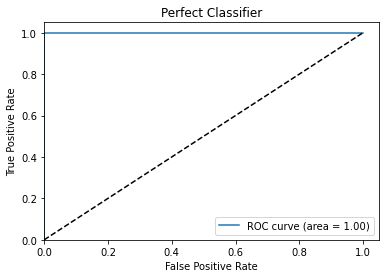

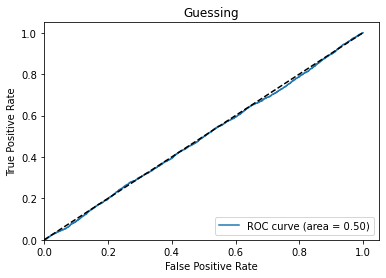

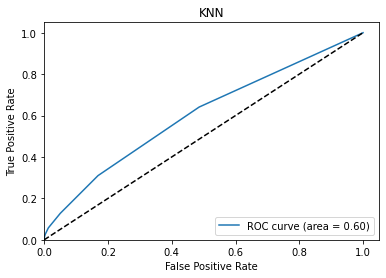

In [34]:
def plot_roc(name, probs):
    fpr, tpr, thresholds = roc_curve(test['serious_dlqin2yrs'], probs)
    roc_auc = auc(fpr, tpr)
    pl.clf()
    pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.05])
    pl.ylim([0.0, 1.05])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title(name)
    pl.legend(loc="lower right")
    pl.show()
plot_roc("Perfect Classifier", test['serious_dlqin2yrs'])
plot_roc("Guessing", np.random.uniform(0, 1, len(test['serious_dlqin2yrs'])))

#[::,1] selects the 2nd column of the numpy array
plot_roc("KNN", preds[::,1])


## RANDOMFOREST

## Using Randomized search cv to select best hyperparameters

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RandomForestClassifier()

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

search = RandomizedSearchCV(model, hyperF, cv = cv, verbose = 1, 
                      n_jobs = -1)
result = search.fit(train[features], train.serious_dlqin2yrs)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best Score: 0.9359245522867103
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 100, 'min_samples_leaf': 1, 'max_depth': 15}


              precision    recall  f1-score   support

           0       0.94      0.99      0.97     34945
           1       0.54      0.14      0.22      2468

    accuracy                           0.94     37413
   macro avg       0.74      0.56      0.59     37413
weighted avg       0.92      0.94      0.92     37413



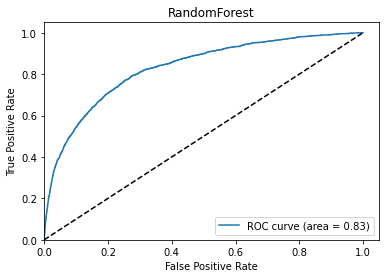

In [35]:
clf = RandomForestClassifier(n_estimators= 300, min_samples_split= 100, min_samples_leaf= 1, max_depth=15)
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
print (classification_report(test['serious_dlqin2yrs'], clf.predict(test[features])))
plot_roc("RandomForest", probs)

## XGBOOST

In [35]:
!pip install xgboost

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     35234
           1       0.58      0.15      0.24      2472

    accuracy                           0.94     37706
   macro avg       0.76      0.57      0.60     37706
weighted avg       0.92      0.94      0.92     37706



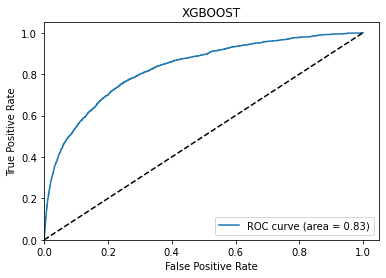

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier 
clf = XGBClassifier(tree_method = 'auto')
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
print (classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))
plot_roc("XGBOOST", probs)

## Logistic Regression

### Hyper Parameter Tuning

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(train[features], train.serious_dlqin2yrs)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'n

Best Score: 0.933038837568348
Best Hyperparameters: {'C': 0.007854253333141461, 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     35020
           1       0.53      0.02      0.03      2472

    accuracy                           0.93     37492
   macro avg       0.73      0.51      0.50     37492
weighted avg       0.91      0.93      0.90     37492



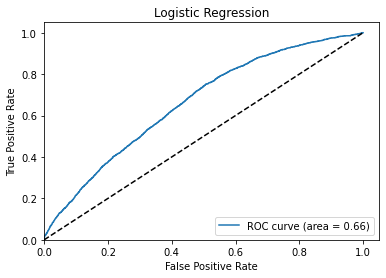

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.007854253333141461, penalty = 'l1', solver = 'liblinear')
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
print (classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))
plot_roc("Logistic Regression", probs)

In [38]:
!pip install imblearn

In [39]:
finaltest = pd.read_csv("data/cs-test.csv")
finaltest.tail()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,monthly_income_imputed
37661,0,0.067644,64,0,0.254976,5525.0,12,0,1,0,0.0,16800.0
37662,0,0.002485,82,0,0.000800,5000.0,5,0,0,0,0.0,4166.0
37663,0,0.037548,84,0,25.000000,4166.0,5,0,0,0,0.0,4166.0
37664,0,0.902051,31,1,0.347924,7515.0,10,0,1,0,0.0,6743.0
37665,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0,5500.0


In [40]:
finaltest.columns = [camel_to_snake(col) for col in finaltest.columns]
coltest = finaltest.columns.tolist()[1:]
coltest

['revolving_utilization_of_unsecured_lines',
 'age',
 'number_of_time30-59_days_past_due_not_worse',
 'debt_ratio',
 'monthly_income',
 'number_of_open_credit_lines_and_loans',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines',
 'number_of_time60-89_days_past_due_not_worse',
 'number_of_dependents',
 'monthly_income_imputed']

## Decision Tree

In [41]:
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train[features], train.serious_dlqin2yrs)

DecisionTreeClassifier()

In [42]:
print(classification_report(test['serious_dlqin2yrs'], dt.predict(test[features]), labels=[0, 1]))
probs = dt.predict_proba(test[features])[::,1]

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     35234
           1       0.23      0.25      0.24      2472

    accuracy                           0.90     37706
   macro avg       0.59      0.60      0.59     37706
weighted avg       0.90      0.90      0.90     37706



In [43]:
dt.score(test[features], test.serious_dlqin2yrs)


0.8960112448947117

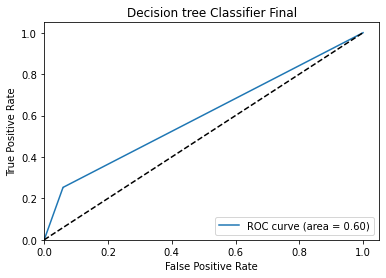

In [44]:
plot_roc("Decision tree Classifier Final", probs)

## Bagging

In [45]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(train[features], train.serious_dlqin2yrs)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=5)

In [46]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(train[features], train.serious_dlqin2yrs)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [47]:
bg.score(test[features], test.serious_dlqin2yrs)


0.9353153344295337

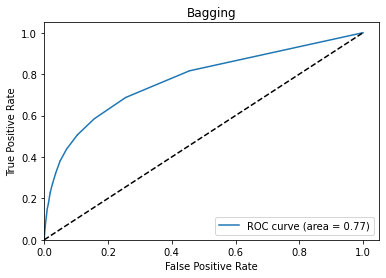

In [48]:
probs = bg.predict_proba(test[features])[::,1]
plot_roc("Bagging", probs)

In [49]:
print(classification_report(test['serious_dlqin2yrs'], bg.predict(test[features]), labels=[0, 1]))
probs = bg.predict_proba(test[features])[::,1]

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     35234
           1       0.52      0.15      0.23      2472

    accuracy                           0.94     37706
   macro avg       0.73      0.57      0.60     37706
weighted avg       0.92      0.94      0.92     37706



## Boosting

In [50]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(train[features], train.serious_dlqin2yrs)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=5)

In [51]:
adb.score(test[features], test.serious_dlqin2yrs)


0.9146289715164695

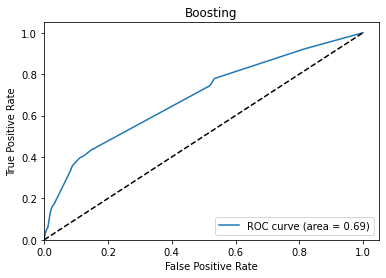

In [52]:
probs = adb.predict_proba(test[features])[::,1]
plot_roc("Boosting", probs)

## Ensemble Learning

In [53]:
evc = VotingClassifier( estimators= [('clf',clf),('dt',dt),('adb',adb)], voting = 'hard')
evc.fit(train[features], train.serious_dlqin2yrs)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('clf', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('adb',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 learning_rate=1,
                                                 n_estimators=5))])

In [54]:
evc.score(test[features], test.serious_dlqin2yrs)

0.9270142682862144

In [55]:
print(classification_report(test['serious_dlqin2yrs'], evc.predict(test[features]), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     35234
           1       0.36      0.14      0.20      2472

    accuracy                           0.93     37706
   macro avg       0.65      0.56      0.58     37706
weighted avg       0.90      0.93      0.91     37706



## USING SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

strategy = {0:105883 , 1:70000}
sm_data  = SMOTE(random_state=69, sampling_strategy=strategy, n_jobs=-1)
X_sm, y_sm = sm_data.fit_resample(train[features],train.serious_dlqin2yrs )

D:\anaconda\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (105883) in class 0 will be larger than the number of samples in the majority class (class #0 -> 104740)
  warnings.warn(


PCA is a linear dimensionality reduction technique. It transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible.The main concept behind the PCA is to consider the correlation among features. If the correlation is very high among a subset of the features, PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features. The algorithm keeps performing this correlation reduction, finding the directions of maximum variance in the original high-dimensional data and projecting them onto a smaller dimensional space. These newly derived components are known as principal components.

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     35234
           1       0.23      0.56      0.33      2472

    accuracy                           0.85     37706
   macro avg       0.60      0.71      0.62     37706
weighted avg       0.92      0.85      0.88     37706



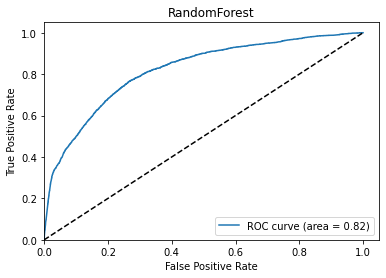

In [57]:
clf = RandomForestClassifier(n_estimators=15,max_depth = 10, random_state=0)
clf.fit(X_sm, y_sm)
probs = clf.predict_proba(test[features])[::,1]
print (classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))
plot_roc("RandomForest", probs)

## GRADIENT BOOSTING CLASSIFIER

In [58]:
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'number_of_times90_days_late', 'number_real_estate_loans_or_lines']

In [59]:
clf = GradientBoostingClassifier()
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
print (classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97     35234
           1       0.60      0.13      0.21      2472

    accuracy                           0.94     37706
   macro avg       0.77      0.56      0.59     37706
weighted avg       0.92      0.94      0.92     37706



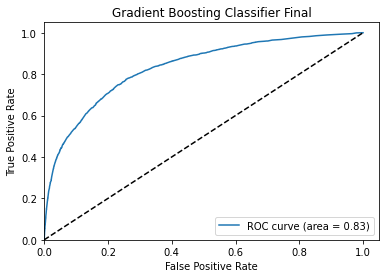

In [60]:
plot_roc("Gradient Boosting Classifier Final", probs)


# # CHECKING FEATURE IMPORTANCE

Elapsed time to compute the importances: 0.047 seconds


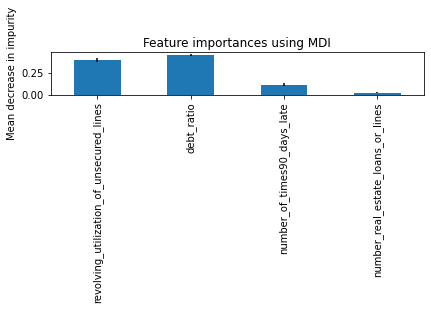

In [62]:
forest = RandomForestClassifier(random_state=0)
forest.fit(train[features], train.serious_dlqin2yrs)
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Making dump file and fumction for flask

In [63]:
import joblib
joblib.dump(clf,"credit_scoring_model.pkl")

['credit_scoring_model.pkl']

In [64]:
import joblib
import numpy as np


def predict(input):
    model = joblib.load('credit_scoring_model.pkl')
    input = np.array(test.iloc[0][features])
    input = input.reshape(1,4)
    prediction = model.predict(input)
    if prediction[0] == 0:
        return "Congratulations! You are eligible for Loan."
    else:
        return "Sorry! You are not eligible for Loan."
    
    
user_list = [0.766126609, 0.802982129, 0.0, 6.0]    
predict(user_list)

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'Congratulations! You are eligible for Loan.'